### 51 N-Queens

#how to build a board:比如board=[1,3,0,2]，这是4皇后问题的一个解，意思是：在第0行，皇后放在第1列；在第1行，皇后放在第3列；在第2行，皇后放在第0列；在第3行，皇后放在第2列。
即：board的值表示列位置，index表示行位置

In [ ]:
#需要什么辅助函数：check是否满足solution的条件；search如何搜索（dfs）

#check 时的约束条件：
1.不同行：这个自然满足，数组board下标不同

2不同列：这个只要使board中各元素值不相同就行了。即board[i]!=board[j]

3.不同斜线：这个只要使board中元素相应的横纵坐标差的绝对值不等就行了。即|board[i]-board[j]|!=|i-j| Or：两元素坐标绝对值！=1

In [ ]:
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        #build an initial board
        self.board=[-1 for i in range(n)]

        #build an initial solution, a list
        self.res=[]

        #do dfs
        self.dfs(0,[],n)
        return self.res

    def check(self,k,j): #check if the kth queen can be put in the jth column
        for i in range(k):
                if self.board[i]==j or abs(k-i)==abs(self.board[i]-j):
                    return False
        return True

    def dfs(self,depth,valuelist,n): 
        if depth==n:  #finish traversing
            self.res.append(valuelist)
            return
        for i in range(n): #row first column second
            if self.check(depth,i):
                self.board[depth]=i  #put Queen on the 'depth'th row the ith column
                solution='.'*n
                self.dfs(depth+1,valuelist+[solution[:i]+'Q'+solution[i+1:]],n)
    #144 ms, faster than 27.46% of Python3    

In [ ]:
#simplify the code
class Solution:
    def solveNQueens(self, n):
        def check(k, j):  # check if the kth queen can be put in column j!
            for i in range(k):
                if board[i]==j or abs(k-i)==abs(board[i]-j):
                    return False
            return True
        def dfs(depth, valuelist):
            if depth==n: res.append(valuelist); return
            for i in range(n):
                if check(depth,i): 
                    board[depth]=i
                    s='.'*n
                    dfs(depth+1, valuelist+[s[:i]+'Q'+s[i+1:]])
        board=[-1 for i in range(n)]
        res=[]
        dfs(0,[])
        return res
#inner functions, no need to write self.---

### 52 N-Queens II
#the difference is the final return

In [ ]:
class Solution:
    def totalNQueens(self, n: int) -> int:
         #build an initial solution
        self.count=0
       
        #create an initial board
        self.board=[-1 for i in range(n)]
        
        #do dfs
        self.dfs(0, n)
        
        return self.count
    
    def check(self, k,j):
        for i in range(k):
            if self.board[i]==j or abs(k-i)==abs(self.board[i]-j):
                return False
        return True
    def dfs(self,depth, n):
        if depth==n:
            self.count+=1
        for i in range(n):
            if self.check(depth,i):
                s='.'*n
                self.board[depth]=i
                self.dfs(depth+1,n)
  #120 ms, faster than 24.59% of Python3        

### 842. Split Array into Fibonacci Sequence
#The problem is: 退出搜索的条件。
#对通过DFS对num_str进行切割，判断

In [ ]:
class Solution:
    def splitIntoFibonacci(self, S: str):
        res = []
        self.dfs(S, [], res)
        return res
        
    def dfs(self, num_str, path, res):
        if len(path) >= 3 and  path[-1] != path[-2] + path[-3]:
            return False
        if not num_str and len(path) >= 3:
            res.extend(path)
            return True
        for i in range(len(num_str)):
            curr = num_str[:i+1]
            if (curr[0] == '0' and len(curr) != 1) or int(curr) >= 2**31:
                continue
            if self.dfs(num_str[i+1:], path + [int(curr)], res):
                return True
        return False

#132 ms, faster than 38.35% of Python3

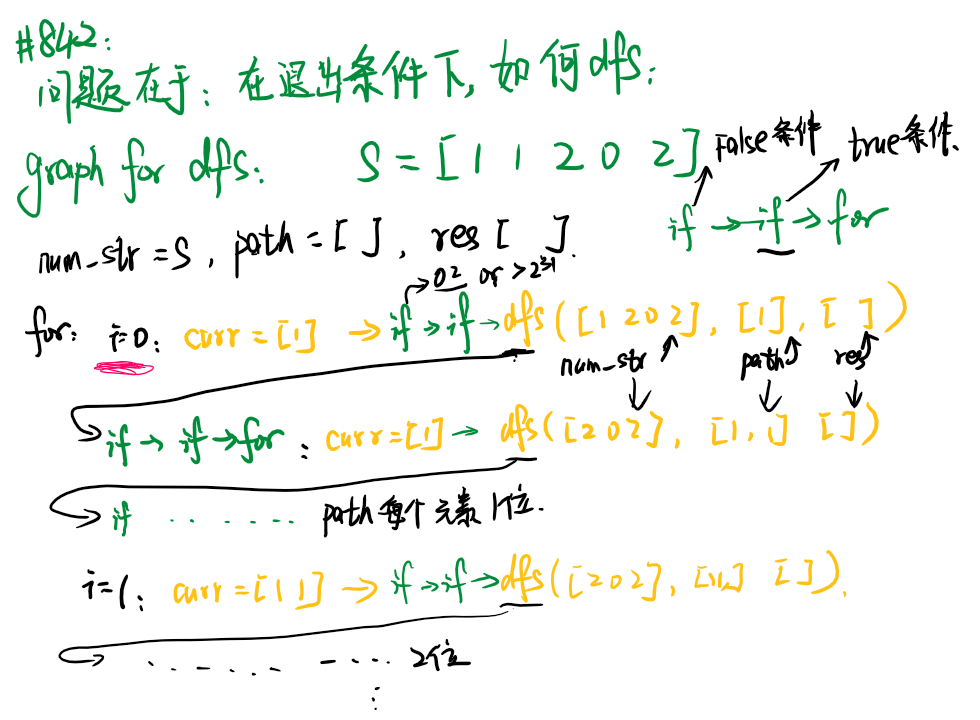

In [7]:
from IPython.display import Image   
Image(filename='BT1.png')

### 78 subsets

In [ ]:
#dfs,找到1开头，2开头，3开头的所有子集；
#防止重复：每轮遍历后又把上轮的头元素去掉，这样不会出现重复子集:use 'index' parameter

In [ ]:
def subsets(self, nums: List[int]):
    res=[]
    nums.sort()
    self.dfs(nums,0,[],res)
    return res
def dfs(self,number,index,path,res):
    res.append(path)
    for i in range(index,len(number)):  #outer layer loop: visit the number list one by one
        self.dfs(number,i+1,path+[number[i]],res) #inner layer recursive:check and store the elements for each loop
        
#32 ms, faster than 99.94% of Python3 

In [24]:
def dfs(number,index,path,res):
    res.append(path)
    for i in range(index,len(number)):
        dfs(number,i+1,path+[number[i]],res)
        print(res)
dfs([1,2,3],0,[],[])

[[], [1], [1, 2], [1, 2, 3]]
[[], [1], [1, 2], [1, 2, 3]]
[[], [1], [1, 2], [1, 2, 3], [1, 3]]
[[], [1], [1, 2], [1, 2, 3], [1, 3]]
[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3]]
[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3]]
[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]


### 90 Subsets II

In [ ]:
#key point: check duplicates when dfs, if in res, not append in res

In [ ]:
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        res=[]
        nums.sort()
        self.dfs(nums,0,[],res)
        return res
    def dfs(self,number,index,path,res):
        if path not in res:
            res.append(path)
        for i in range(index,len(number)):
            self.dfs(number,i+1,path+[number[i]],res)
#52 ms, faster than 42.98% of Python3 

### 40. Combination Sum II

In [ ]:
def combinationSum3(self, k: int, n: int) -> List[List[int]]:
    candidates.sort()
    res = []
    
    def dfs(target, index, valuelist, res):
    if target == 0 and valuelist not in res:
        return res.append(valuelist)
    for i in range(index, len(candidates)): #traversing method is alike 90
        if target < candidates[i]:
            return
        dfs(target - candidates[i], i + 1, valuelist + [candidates[i]], res)
    
    dfs(target, 0, [], res)
    return res
#64 ms, faster than 72.17% of Python3

### 216. Combination Sum III

In [ ]:
# No duplicate combination/set
# No duplicate numbers in each set,1-9

In [ ]:
class Solution:
    def combinationSum3(self, k: int, n: int) -> List[List[int]]:
        res=[]
        nums=range(1,10)
        
        def dfs(k,n,index,path,res):
            if k<0 or n<0: return
            elif k==0 and n==0:
                res.append(path)
                return
            for i in range(index, 9):
                dfs(k-1,n-nums[i],i+1,path+[nums[i]],res)
        dfs(k,n,0,[],res)
        return res
#32 ms, faster than 99.51% of Python3

In [ ]:
#Summary dfs for backtracking(枚举遍历)

def dfs('other conditional parameter',nums,index,path,res):
            #condition check
                res.append(path)
            for i in range(index, len(nums)):
                dfs('other conditional parameter',i+1,path+[nums[i]],res)